In [1]:
%matplotlib inline

In [66]:
import warnings
warnings.filterwarnings('ignore')

## Geopandas

In [2]:
import geopandas as gpd

## World

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
#cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [6]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


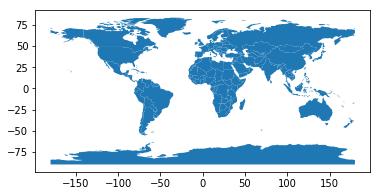

In [8]:
world.plot();

## US States

In [29]:
north_america = world.query("continent == 'North America'").copy().reset_index()

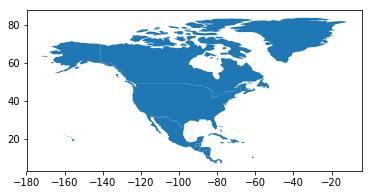

In [30]:
north_america.plot();

In [31]:
north_america

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,17,309156.0,North America,Bahamas,BHS,9093.0,(POLYGON ((-77.53465999999997 23.7597499999999...
1,20,307899.0,North America,Belize,BLZ,2536.0,POLYGON ((-89.14308041050332 17.80831899664932...
2,27,33487208.0,North America,Canada,CAN,1300000.0,(POLYGON ((-63.66449999999998 46.5500099999999...
3,36,4253877.0,North America,Costa Rica,CRI,48320.0,POLYGON ((-82.96578304719736 8.225027980985985...
4,37,11451652.0,North America,Cuba,CUB,108200.0,POLYGON ((-82.26815121125706 23.18861074471771...
5,44,9650054.0,North America,Dominican Rep.,DOM,78000.0,POLYGON ((-71.71236141629296 19.71445587816736...
6,65,57600.0,North America,Greenland,GRL,1100.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
7,66,13276517.0,North America,Guatemala,GTM,68580.0,POLYGON ((-90.09555457229098 13.73533763270073...
8,68,7792854.0,North America,Honduras,HND,33720.0,"POLYGON ((-87.31665442579549 12.984685777229, ..."
9,70,9035536.0,North America,Haiti,HTI,11500.0,POLYGON ((-73.18979061551762 19.91568390551191...


In [32]:
north_america.describe()

,index,pop_est,gdp_md_est
count,18.000000,1.800000e+01,1.800000e+01
mean,81.722222,2.996394e+07,1.029858e+06
std,48.654612,7.537815e+07,3.538918e+06
min,17.000000,5.760000e+04,1.100000e+03
25%,38.750000,2.959564e+06,1.782000e+04
50%,69.000000,6.538208e+06,4.123000e+04
75%,121.250000,1.100125e+07,7.605750e+04
max,168.000000,3.139730e+08,1.509400e+07


In [20]:
north_america.pop_est.sum()

539350981.0

In [21]:
north_america.pop_est / north_america.pop_est.sum()

17     0.000573
20     0.000571
27     0.062088
36     0.007887
37     0.021232
44     0.017892
65     0.000107
66     0.024616
68     0.014449
70     0.016753
80     0.005239
102    0.206196
116    0.010923
123    0.006231
128    0.007363
144    0.013322
160    0.002429
168    0.582131
Name: pop_est, dtype: float64

In [35]:
north_america['pop_ratio'] = north_america.pop_est / north_america.pop_est.sum()

In [36]:
north_america['gdp_ratio'] = north_america.gdp_md_est / north_america.gdp_md_est.sum()

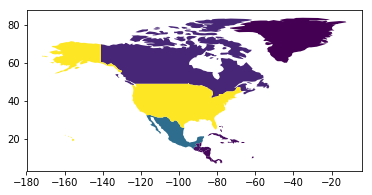

In [26]:
north_america.plot(column='pop_ratio');

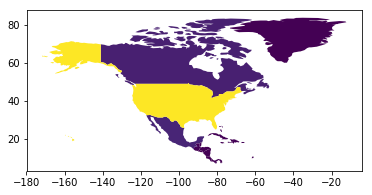

In [27]:
north_america.plot(column='gdp_ratio');

## US States

In [43]:
us_states = gpd.GeoDataFrame.from_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_5m.zip')
len(us_states)

56

In [44]:
us_states_50 = us_states.query("STUSPS not in ['DC', 'VI', 'PR', 'AS', 'GU', 'MP']")
len(us_states_50)

50

In [45]:
us_states_continental = us_states_50.query("STUSPS not in ['HI']")
len(us_states_continental)

49

In [47]:
us_states_contiguous = us_states_continental.query("STUSPS not in ['AK']").copy()
len(us_states_contiguous)

48

In [48]:
us_states_contiguous['WATER_LAND_RATIO'] = us_states_contiguous.AWATER / us_states_contiguous.ALAND

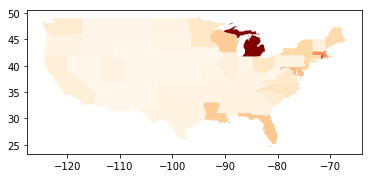

In [55]:
us_states_contiguous.plot(column='WATER_LAND_RATIO', cmap='OrRd');

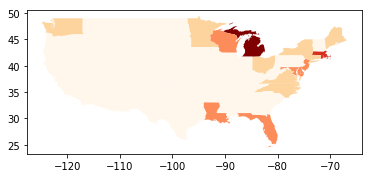

In [64]:
us_states_contiguous.plot(column='WATER_LAND_RATIO', cmap='OrRd', scheme='fisher_jenks');

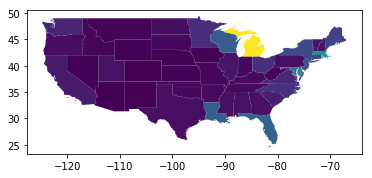

In [57]:
us_states_contiguous.plot(column='WATER_LAND_RATIO', cmap='viridis');

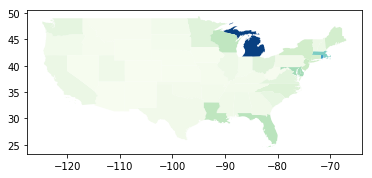

In [61]:
us_states_contiguous.plot(column='WATER_LAND_RATIO', cmap='GnBu');

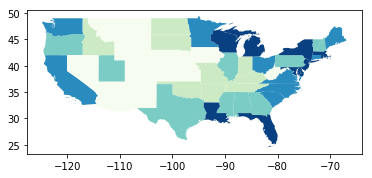

In [67]:
us_states_contiguous.plot(column='WATER_LAND_RATIO', cmap='GnBu', scheme='quantiles');

## US Counties

In [ ]:
us_counties = gpd.GeoDataFrame.from_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_5m.zip')
len(us_counties)